In [2]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=10000)


In [5]:
def verctorize_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.int8)
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = verctorize_seq(train_data)
x_test = verctorize_seq(test_data)
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')


In [8]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=['accuracy'])
x_val = x_train[:10000]
partitial_x_train = x_train[10000:]
y_val = y_train[:10000]
partitial_y_train = y_train[10000:]
history= model.fit(partitial_x_train,
                  partitial_y_train,
                  epochs=5,
                  batch_size=512,
                  validation_data = (x_val, y_val))
result =model.evaluate(x_test,y_test)




Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 123us/step - loss: 0.5324 - accuracy: 0.7391 - val_loss: 0.3710 - val_accuracy: 0.8467
Epoch 2/5
15000/15000 [==============================] - 2s 105us/step - loss: 0.2673 - accuracy: 0.8961 - val_loss: 0.5107 - val_accuracy: 0.7879
Epoch 3/5
15000/15000 [==============================] - 2s 106us/step - loss: 0.2040 - accuracy: 0.9224 - val_loss: 0.2779 - val_accuracy: 0.8877
Epoch 4/5
15000/15000 [==============================] - 2s 106us/step - loss: 0.1333 - accuracy: 0.9511 - val_loss: 0.3033 - val_accuracy: 0.8852
Epoch 5/5
25000/25000 [==============================] - 2s 88us/step


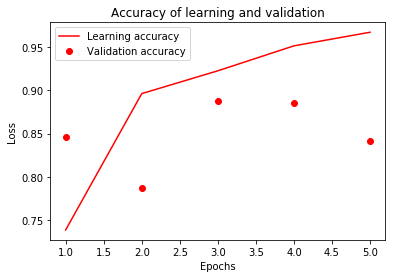

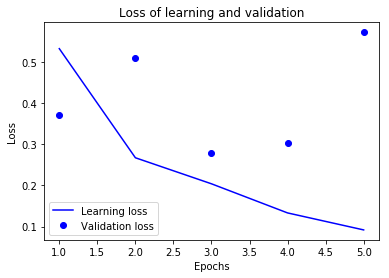

,0
0,0.01
1,0.83
2,0.98
3,1
4,0.99
5,0.99
6,0.97
7,1
8,0
9,0.99


In [11]:
import matplotlib.pyplot as plt

history_info = history.history
acc = history_info['accuracy']
val_acc = history_info['val_accuracy']
loss = history_info['loss']
val_loss = history_info['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label="Learning accuracy")
plt.plot(epochs, val_acc, 'ro', label="Validation accuracy")
plt.title("Accuracy of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label="Learning loss")
plt.plot(epochs, val_loss, 'bo', label="Validation loss")
plt.title("Loss of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

test_val=model.predict(x_test)[50:80]
round_val = np.around(test_val, decimals=2)
df=pd.DataFrame(round_val)
def color_val(val):
    if val >= 0.89 or val < 0.09:
        color = 'green'
    else:
        color = 'red'
    return "color: %s" %color
col = df.style.applymap(color_val)
col
